# Background

* Fashion Industry accounts for 3% of world GDP.
* We assume a Fashion retailer hired us to build a virtual stylist assistant, which looks at customers instagram, facebook images and classifies what they're wearing - bags, dress or pants etc.
* This can help the retailer grasp the latest trends and launch targeted marketing campaigns.
* We use Fashion MNIST data, use deep network to classify images into 10 classes.

# Problem

* Fashion dataset has 28x28 pixels grayscale images - 70,000 images. (Values range from 0 black to 255 white)
* 60,000 training and 10,000 testing.
* 10 classes - tshirt/top(0), trousers(1), pullover(2), dress(3),coat(4),sandal(5), shirt(6), sneaker(7), bag(8), ankle boot(9).

# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

In [2]:
train=pd.read_csv('fashion-mnist_train.csv')

In [3]:
test=pd.read_csv('fashion-mnist_test.csv')

In [4]:
train.shape

(60000, 785)

In [5]:
test.shape

(10000, 785)

# Visualize Dataset

In [8]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
training=np.array(train,dtype='float32')

In [9]:
testing=np.array(test,dtype='float32')

In [26]:
i=random.randint(1,60000)

2.0


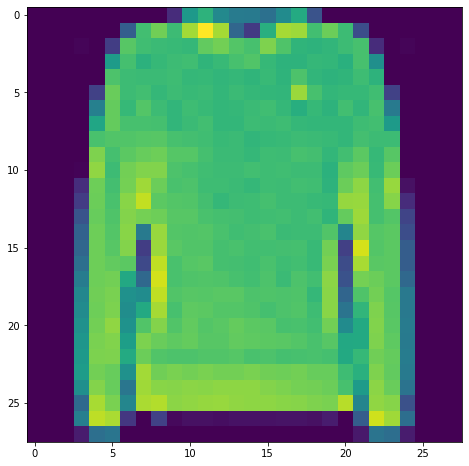

In [27]:
# See one image
plt.figure(figsize=(12,8))
plt.imshow(training[i,1:].reshape(28,28));
label=training[i,0]
print(label)

# View images in grid format

In [92]:
W_grid=15
L_grid=15

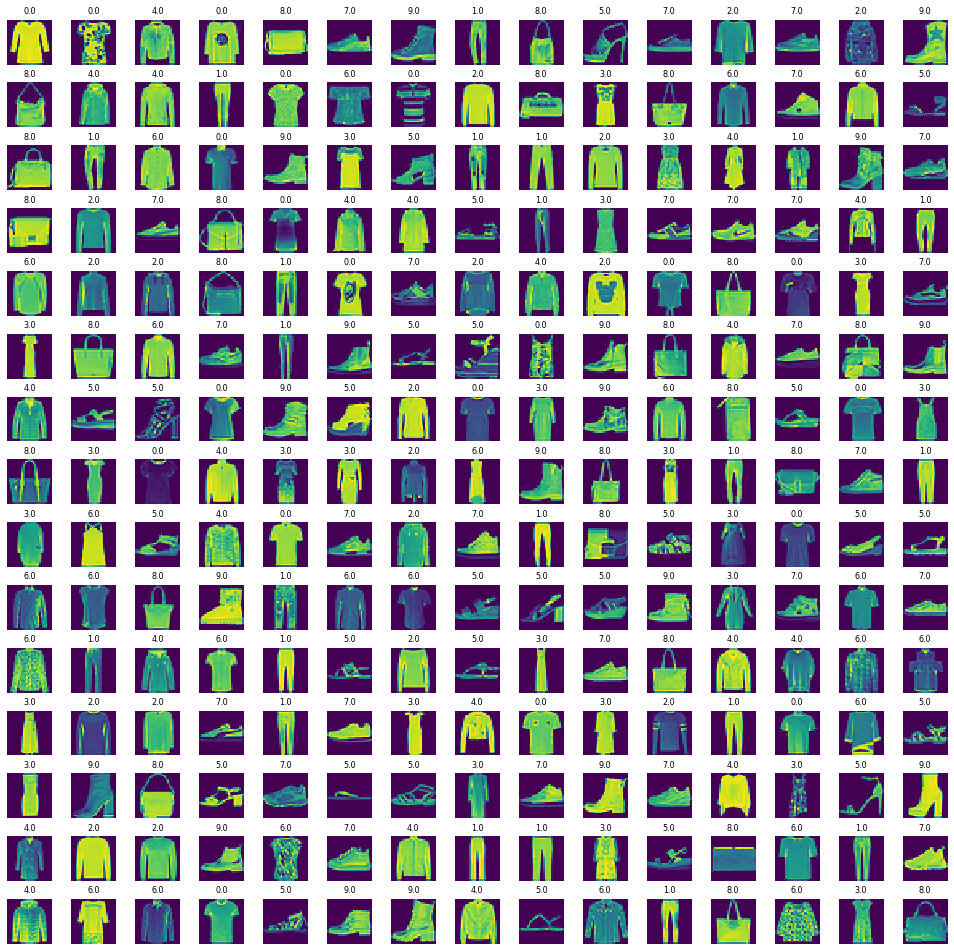

In [48]:
fig,axes=plt.subplots(L_grid,W_grid,figsize=(17,17))
axes=axes.ravel() #Flatten the 15x15 matrix in 225 array
n_training=len(training)

for i in np.arange(0,W_grid * L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Model training - Convolutional Neural Network

# Process overview ->
* Convolution --> Kernel/Feature Detectors --> Pooling Filters--> Flattening --> Input to our network
* All this is done because pixels have to be dependent on other pixels.

* Kernels/feature detector -> 
    * Convolutions use a kernel matrix to scan a image and apply a filter like blurring or sharpening.
    * In ML, kernels are used to extract features in an image.
    * Convolutions preserve spatial relationship between pixels.
    * The kernels / feature detectors -> will create feature maps/Matrices from image -> some representation of image features -> for example, to blur an image --> Scan the pixels --> take average --> Feature map (used in Instagram filters) !

* RELU function is added to create non-linearity in feature map - max(0,z) - Increase sparsity/scattered of feature maps -> Intuitively, This will help image/features "pop up" and rest will be 0.

* Max pooling(pooling or down sampling)/ Flattening - Reduces the feature map dimensionality while preserving information.
    * Also helps the model to generalize.
    * Max pooling -> takes max of the stride filter.
* Flattening - one array to be fed to the network.

# Train Model

In [10]:
X_train=training[:,1:]/255.0
y_train=training[:,0]
X_test=testing[:,1:]/255.0
y_test=testing[:,0]

## Validation set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

In [16]:
# Change data for convolutional network shape
#Gray scale image 28x28
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_valid=X_valid.reshape(X_valid.shape[0],*(28,28,1))

# Model

In [24]:
import tensorflow as tf
from tensorflow import keras

In [65]:
es=keras.callbacks.EarlyStopping(patience=5)
cnn_model=keras.models.Sequential(
[
    #3x3 32 feature detectors
    keras.layers.Conv2D(32,3,3,input_shape=[28,28,1],activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [66]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])

In [67]:
history=cnn_model.fit(X_train,y_train,epochs=50,batch_size=512,validation_data=(X_valid,y_valid),callbacks=[es])

Epoch 1/50
94/94 [==============================] - 1s 14ms/step - loss: 0.7378 - accuracy: 0.7270 - val_loss: 0.5058 - val_accuracy: 0.8148
Epoch 2/50
94/94 [==============================] - 1s 12ms/step - loss: 0.4548 - accuracy: 0.8348 - val_loss: 0.4218 - val_accuracy: 0.8471
Epoch 3/50
94/94 [==============================] - 1s 12ms/step - loss: 0.4109 - accuracy: 0.8509 - val_loss: 0.4023 - val_accuracy: 0.8513
Epoch 4/50
94/94 [==============================] - 1s 12ms/step - loss: 0.3736 - accuracy: 0.8662 - val_loss: 0.3739 - val_accuracy: 0.8648
Epoch 5/50
94/94 [==============================] - 1s 12ms/step - loss: 0.3512 - accuracy: 0.8736 - val_loss: 0.3930 - val_accuracy: 0.8597
Epoch 6/50
94/94 [==============================] - 1s 12ms/step - loss: 0.3404 - accuracy: 0.8769 - val_loss: 0.3633 - val_accuracy: 0.8689
Epoch 7/50
94/94 [==============================] - 1s 12ms/step - loss: 0.3244 - accuracy: 0.8812 - val_loss: 0.3556 - val_accuracy: 0.8722
Epoch 8/50
94

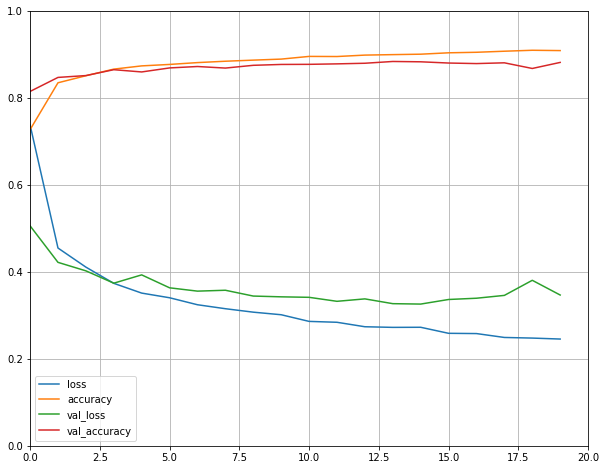

In [71]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.gca().set_xlim(0,20)
plt.show()

# Model Evaluation

In [74]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 899us/step - loss: 0.3337 - accuracy: 0.8825


[0.3336752951145172, 0.8824999928474426]

In [90]:
y_pred=cnn_model.predict_classes(X_test)

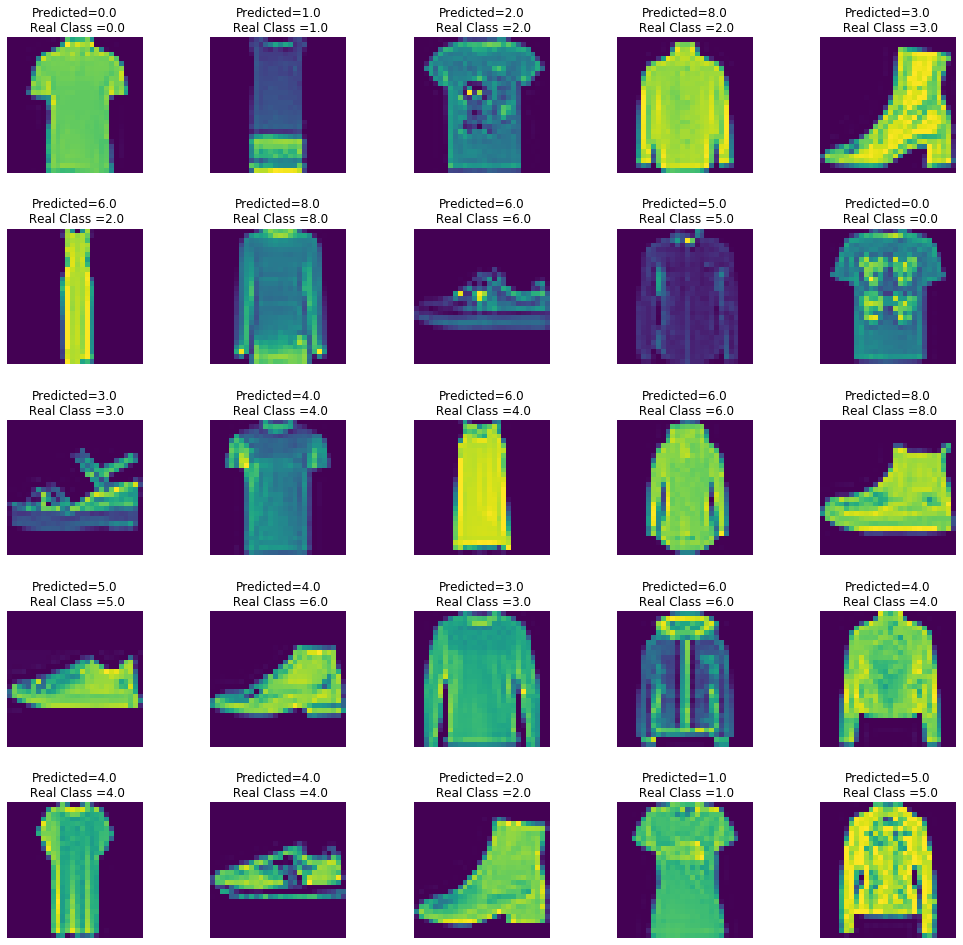

In [97]:
fig,axes=plt.subplots(5,5,figsize=(17,17))
axes=axes.ravel() #Flatten the 15x15 matrix in 225 array
n_training=len(training)

for i in np.arange(0,5 * 5):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title("Predicted={:0.1f}\n Real Class ={:0.1f}".format(y_pred[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [116]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [99]:
acc=accuracy_score(y_test,y_pred)

In [112]:
acc

0.8825

In [113]:
cm=confusion_matrix(y_test,y_pred)

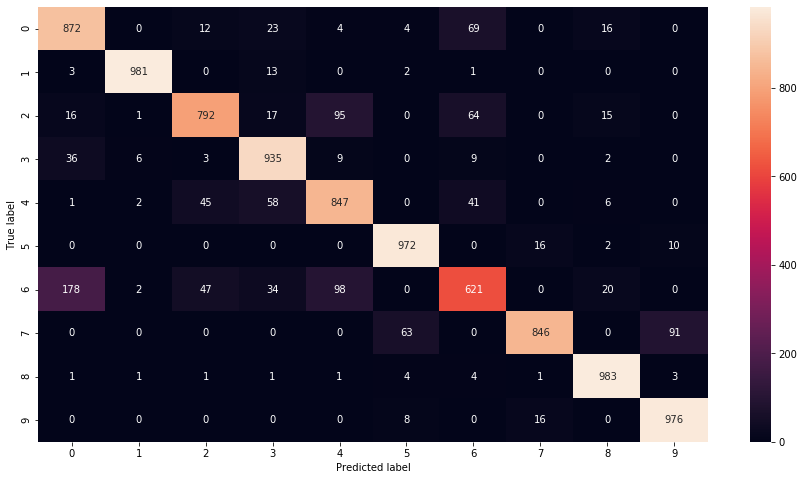

In [115]:
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [117]:
num_class=10
target_name=["Class {}".format(i) for i in range(num_class)]

print(classification_report(y_test,y_pred,target_names=target_name))

              precision    recall  f1-score   support

     Class 0       0.79      0.87      0.83      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.88      0.79      0.83      1000
     Class 3       0.86      0.94      0.90      1000
     Class 4       0.80      0.85      0.82      1000
     Class 5       0.92      0.97      0.95      1000
     Class 6       0.77      0.62      0.69      1000
     Class 7       0.96      0.85      0.90      1000
     Class 8       0.94      0.98      0.96      1000
     Class 9       0.90      0.98      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Improve the Model

### Using more Filters and/or Dropout
* Increase feature detectors to 64/124
* Dropout to regularize to reduce overfit and help generalize and reduce co-dependency among neurons.

In [126]:
es2=keras.callbacks.EarlyStopping(patience=5)
cnn_model2=keras.models.Sequential(
[
    #3x3 32 feature detectors
    keras.layers.Conv2D(64,7,input_shape=[28,28,1],activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,3,activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
])

In [127]:
cnn_model2.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])

In [128]:
history2=cnn_model2.fit(X_train,y_train,epochs=50,batch_size=512,validation_data=(X_valid,y_valid),callbacks=[es2])

Epoch 1/50
94/94 [==============================] - 33s 349ms/step - loss: 1.3398 - accuracy: 0.5078 - val_loss: 0.6113 - val_accuracy: 0.7525
Epoch 2/50
94/94 [==============================] - 33s 354ms/step - loss: 0.8352 - accuracy: 0.6656 - val_loss: 0.4902 - val_accuracy: 0.8010
Epoch 3/50
94/94 [==============================] - 33s 350ms/step - loss: 0.6940 - accuracy: 0.7255 - val_loss: 0.4364 - val_accuracy: 0.8282
Epoch 4/50
94/94 [==============================] - 35s 371ms/step - loss: 0.6278 - accuracy: 0.7584 - val_loss: 0.4123 - val_accuracy: 0.8543
Epoch 5/50
94/94 [==============================] - 35s 372ms/step - loss: 0.5800 - accuracy: 0.7783 - val_loss: 0.3800 - val_accuracy: 0.8678
Epoch 6/50
94/94 [==============================] - 35s 368ms/step - loss: 0.5328 - accuracy: 0.8003 - val_loss: 0.3396 - val_accuracy: 0.8762
Epoch 7/50
94/94 [==============================] - 37s 390ms/step - loss: 0.5022 - accuracy: 0.8106 - val_loss: 0.3438 - val_accuracy: 0.8819

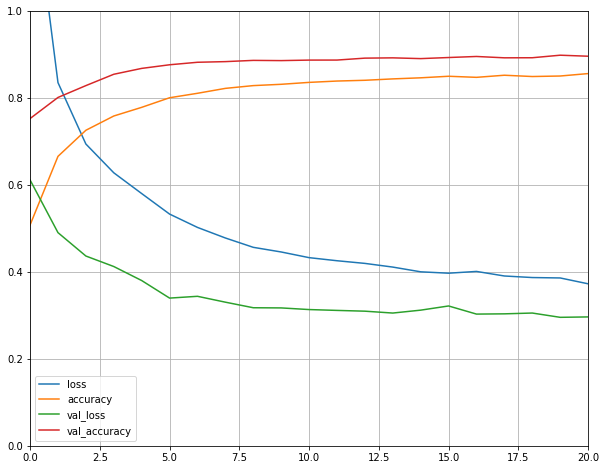

In [129]:
pd.DataFrame(history2.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.gca().set_xlim(0,20)
plt.show()

# Conclusion
* The performance improved via Dropout and increasing features.
* It is harder to predict between t shirts and shirts